<a href="https://colab.research.google.com/github/Dhruba34/Data-Science-projects/blob/main/assignments%20%26%20project/week%202/task_2_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
!wget "https://raw.githubusercontent.com/Dhruba34/Data-Science-projects/refs/heads/main/assignments%20%26%20project/week%202/bow.py"
!wget "https://raw.githubusercontent.com/Dhruba34/Data-Science-projects/main/assignments%20%26%20project/week%202/all-data.csv"
import bow
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
def decode(x):
    return 1 if x=='positive' else 2 if x=='neutral' else 0
def punc(arr):
    return [text.replace('""', '') for text in arr]

class ModelTrainer:
    def __init__(self):
        self.models = {}
        self.results = {}
        self.best_model = None

    def train_logistic_regression(self, X_train, y_train, X_val, y_val):
        """
        Train Logistic Regression with hyperparameter tuning.

        Hyperparameters to tune:
        - C: Regularization strength [0.1, 1.0, 10.0]
          C < 1: More regularization (simpler model)
          C > 1: Less regularization (complex model)

        Returns: (trained_model, metrics_dict)
        """
        param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 10],
                      'solver':['lbfgs','saga'],
                      'penalty':['l1','l2']
                      }

                    #  'penalty':['l1','l2']
        lr = LogisticRegression(
            max_iter=5000,
            random_state=42
        )

        grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy',n_jobs=1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_val)

        metrics = self._calculate_metrics(y_val, y_pred)
        self.models['Logistic Regression'] = best_model
        self.results['Logistic Regression'] = metrics

        return best_model, metrics

    def train_naive_bayes(self, X_train, y_train, X_val, y_val):
        """
        Train Naive Bayes (no hyperparameter tuning needed).
        Works well with sparse text features.

        Returns: (trained_model, metrics_dict)
        """
        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_val)

        metrics = self._calculate_metrics(y_val, y_pred)
        self.models['Naive Bayes'] = nb
        self.results['Naive Bayes'] = metrics

        return nb, metrics

    def train_knn(self, X_train, y_train, X_val, y_val):
        """
        Train K-Nearest Neighbors with hyperparameter tuning.

        Hyperparameters to tune:
        - n_neighbors: [3, 5, 7]
          k=3: More complex, follows data closely
          k=7: Simpler, more stable
        - metric: 'cosine' (better for sparse text)

        Returns: (trained_model, metrics_dict)
        """
        param_grid = {'n_neighbors': [3, 5, 7,10]}
        knn = KNeighborsClassifier(metric='cosine')
        grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_val)

        metrics = self._calculate_metrics(y_val, y_pred)
        self.models['KNN'] = best_model
        self.results['KNN'] = metrics

        return best_model, metrics

    def _calculate_metrics(self, y_true, y_pred):
        """Calculate all evaluation metrics."""
        accuracy = accuracy_score(y_true, y_pred)
        precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        return {
            'accuracy': accuracy,
            'precision': precision_weighted,
            'recall': recall_weighted,
            'f1': f1_weighted,
            'confusion_matrix': confusion_matrix(y_true, y_pred)
        }

    def compare_models(self):
        """Create comparison table and visualizations."""
        df_results = pd.DataFrame(self.results).T
        return df_results


--2026-01-05 12:49:08--  https://raw.githubusercontent.com/Dhruba34/Data-Science-projects/refs/heads/main/assignments%20%26%20project/week%202/bow.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2527 (2.5K) [text/plain]
Saving to: ‘bow.py.1’

bow.py.1            100%[===================>]   2.47K  --.-KB/s    in 0s      

2026-01-05 12:49:08 (49.4 MB/s) - ‘bow.py.1’ saved [2527/2527]

--2026-01-05 12:49:08--  https://raw.githubusercontent.com/Dhruba34/Data-Science-projects/main/assignments%20%26%20project/week%202/all-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP re

In [ ]:
f=pd.read_csv('all-data.csv',names=['sentiment','feedback'],encoding_errors='ignore')
obj=ModelTrainer()
vect=bow.FeatureExtractor()
x=vect.fit_transform_tfidf(punc(f['feedback'].to_numpy()))[0]
y=f['sentiment'].apply(decode).to_numpy()
print(x.shape,y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
obj.train_logistic_regression(x_train,y_train,x_test,y_test)
print("logistic_regression trained")
obj.train_naive_bayes(x_train,y_train,x_test,y_test)
print("naive_bayes trained")
obj.train_knn(x_train,y_train,x_test,y_test)
print("knn trained")

(4846, 10000) (4846,)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

logistic_regression trained
naive_bayes trained
knn trained


                     accuracy precision    recall        f1
Logistic Regression  0.778351   0.77734  0.778351  0.768805
Naive Bayes               0.7   0.72258       0.7  0.655111
KNN                  0.709278  0.695347  0.709278  0.694537
[[ 60  18  43]
 [  5 169  99]
 [  9  41 526]]


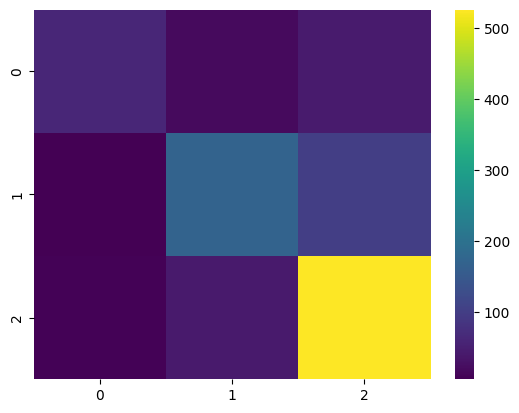

In [ ]:
results=obj.compare_models()[['accuracy','precision','recall','f1']]
print(results)
print(obj.results['Logistic Regression']['confusion_matrix'])
sns.heatmap(obj.results['Logistic Regression']['confusion_matrix'],cmap='viridis')
plt.show()

In [ ]:
import joblib
joblib.dump(obj.models['Logistic Regression'],'lr.pkl')
joblib.dump(obj.models['Naive Bayes'],'nb.pkl')
joblib.dump(obj.models['KNN'],'knn.pkl')
joblib.dump(vect.tfidf_vectorizer,'vector.pkl')

['vector.pkl']